In [49]:
import pandas as pd
import seaborn as sns

In [50]:
do_random = True
if do_random:
    df_in = pd.read_csv("result_random_splits.csv")
    split_type = "RND" 
    split_name = "Random Split"
else:
    df_in = pd.read_csv("result_scaffold_splits.csv")
    split_type = "SCAF" 
    split_name = "Scaffold Split"

Split datasets into SI and MI

In [51]:
df_si = df_in.query("Method == '3D/SI/Net'").copy().reindex()
df_mi = df_in.query("Method == '3D/MI/Bag-AttentionNet'").copy().reindex()

Reshape datasets

In [52]:
combo_df = df_si[['Dataset','R2']]
combo_df['mi'] = df_mi['R2'].values

In [53]:
combo_df.columns = ['dataset','3D/SI/Net','3D/MI/Bag-AttentionNet']

In [54]:
combo_df

,dataset,3D/SI/Net,3D/MI/Bag-AttentionNet
0,A2a.smi,0.35,0.44
2,A2a.smi,0.12,0.48
4,A2a.smi,-0.63,0.45
6,A2a.smi,0.30,0.35
8,A2a.smi,0.35,0.39
...,...,...,...
410,opioid.smi,0.23,0.57
412,opioid.smi,0.39,0.46
414,opioid.smi,0.26,0.52
416,opioid.smi,0.43,0.51


In [55]:
combo_df['split'] = [f"{split_type}_{x:02d}" for x in range(0,10)]*21
combo_df['dataset'] = [x.replace(".smi","") for x in combo_df.dataset]

In [56]:
combo_df

,dataset,3D/SI/Net,3D/MI/Bag-AttentionNet,split
0,A2a,0.35,0.44,RND_00
2,A2a,0.12,0.48,RND_01
4,A2a,-0.63,0.45,RND_02
6,A2a,0.30,0.35,RND_03
8,A2a,0.35,0.39,RND_04
...,...,...,...,...
410,opioid,0.23,0.57,RND_05
412,opioid,0.39,0.46,RND_06
414,opioid,0.26,0.52,RND_07
416,opioid,0.43,0.51,RND_08


Add data from Guassian Process, XGBoost, and FFNN

In [57]:
cmp_df = pd.read_csv("comparison.csv")

In [58]:
cmp_df = cmp_df.merge(combo_df,on=["dataset","split"]).drop([x for x in cmp_df.columns if x.endswith("rmse")],axis=1)

Reshape the data for boxplots

In [59]:
melt_df = cmp_df.melt(id_vars=["dataset","split"])

In [60]:
melt_df.columns = ["Dataset","split","method","R2"]

In [61]:
sns.set(rc={'figure.figsize': (15, 15)})
sns.set(font_scale=1.5)

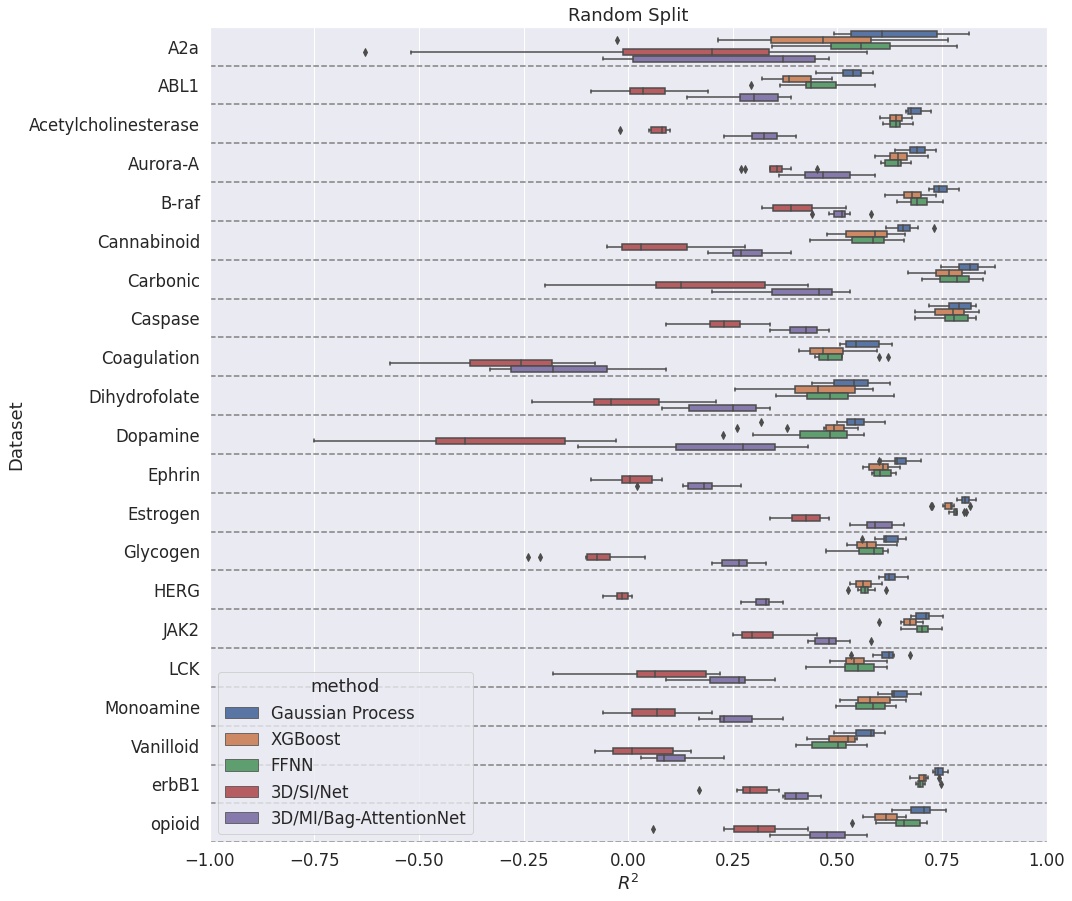

In [62]:
ax = sns.boxplot(x="R2",y="Dataset",data=melt_df,hue="method",orient="h")
for i in range(0,len(melt_df.Dataset.unique())):
    ax.axhline(0.5+i,linestyle="--",color="grey")
ax.set_title(split_name)
ax.set(xlabel="$R^2$")
ax.set(xlim=[-1,1]);

In [63]:
cmp_df

,dataset,split,Gaussian Process,XGBoost,FFNN,3D/SI/Net,3D/MI/Bag-AttentionNet
0,A2a,RND_00,0.752814,0.563589,0.707086,0.35,0.44
1,A2a,RND_01,0.595350,0.214099,0.485521,0.12,0.48
2,A2a,RND_02,0.617880,0.394742,0.599878,-0.63,0.45
3,A2a,RND_03,0.688750,0.687382,0.608980,0.30,0.35
4,A2a,RND_04,0.496913,-0.027546,0.343654,0.35,0.39
...,...,...,...,...,...,...,...
205,opioid,RND_05,0.629443,0.561676,0.534422,0.23,0.57
206,opioid,RND_06,0.758506,0.664784,0.714716,0.39,0.46
207,opioid,RND_07,0.671188,0.580889,0.638506,0.26,0.52
208,opioid,RND_08,0.706622,0.615326,0.695369,0.43,0.51


In [64]:
csv_name = split_name.replace(" ","_")
cmp_df.to_csv(f"{csv_name}.csv",index=False,float_format="%0.2f")